In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


In [3]:
# from libs.distributions.exp_dist import ExpDist
from libs.estimators.mle_estimator import MLE
from libs.estimators.map_estimator import MAP
from libs.estimators.mse_estimator import MSE

In [4]:
input_variables = {
    # Input for generating exponential distribution
    "size": 20, # total number of data
    "lam": 0.2, # lambda value
    "st_range": 1, # start of range data
    "loc": 0,
    "alpha": 30,
    "beta": 100
    # "beta": 20,
    # "beta": 20,
}

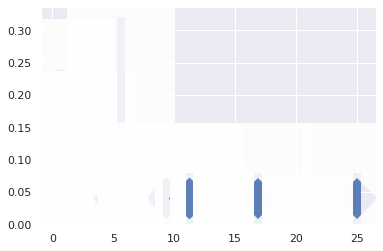

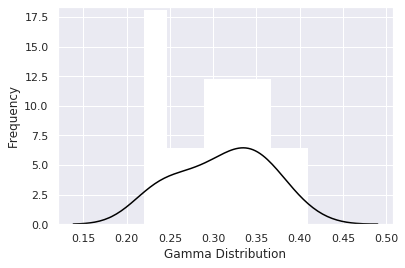

In [5]:
mle_est = MLE(**input_variables)
map_est = MAP(**input_variables)

mle_est.run()
map_est.run()

mle_est.plot()
map_est.plot()

 ***** y =  30 [[0.20464953 0.1995841 ]
 [0.20661147 0.20917334]
 [0.21479267 0.21870553]
 [0.2080543  0.22817471]
 [0.20161895 0.23763051]
 [0.21024028 0.24697383]
 [0.20369383 0.25642485]
 [0.20954236 0.26582186]
 [0.21311194 0.27509572]
 [0.20504801 0.28425042]
 [0.21497536 0.29362746]
 [0.21052455 0.30275107]
 [0.19658316 0.31185914]
 [0.20991346 0.3210556 ]
 [0.21753006 0.33010849]
 [0.21049148 0.33913664]
 [0.21368457 0.34836191]
 [0.21975256 0.35716636]
 [0.20718711 0.3659827 ]
 [0.22306874 0.37507213]
 [0.20837712 0.38401271]
 [0.20008106 0.3925633 ]
 [0.22336833 0.40160252]
 [0.20712748 0.41022634]
 [0.21255026 0.41910455]
 [0.21076531 0.42768136]
 [0.20343506 0.43652783]
 [0.20266284 0.44521222]
 [0.21141741 0.45354753]
 [0.21152129 0.46232798]]


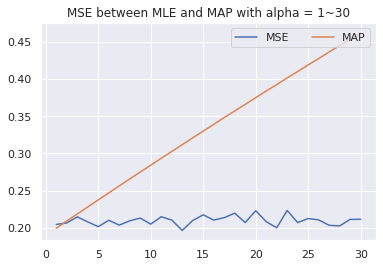

In [9]:
mle_est = MLE(**input_variables)
map_est = MAP(**input_variables)
max_loop = 50
max_alpha = 30
x = np.linspace(1, max_alpha, max_alpha, dtype=int)
# y = np.empty(shape=[max_alpha, 0])
y = []
# print(" ***** y = ", len(y), y)
for alp in range(1, max_alpha+1):
    mle_est.multiple_run(max_loop)
    mle_yhat = mle_est.get_array_yhat()
    mean_mle = np.mean(mle_yhat)
    
    map_est.multiple_run(max_loop, alp)
    map_yhat = map_est.get_array_yhat()
    mean_map = np.mean(map_yhat)
    
    # print(" THIS MLE = ", len(mle_yhat), mle_yhat)
    # print(" THIS MAP = ", len(map_yhat), map_yhat)
    
    # print(" >>> Mean MLE = ", mean_mle)
    # print(" >>> Mean MAP = ", mean_map)
    
    y.append([mean_mle, mean_map])
    # y = np.append(y, np.array([[mean_mle, mean_map]]), axis=0)
    # y[(alp-1)] = [mean_mle, mean_map]
    # print(" ***** y = ", len(y), y)
    # mse_val = MSE().calc(mle_yhat, map_yhat)
    # print(" THIS MSE = ")

y = np.array(y)
print(" ***** y = ", len(y), y)

plt.plot(x, y)
plt.title("MSE between MLE and MAP with alpha = 1~30")
labels = ['MSE', 'MAP']
plt.legend(labels, ncol=2, loc='upper right');

In [5]:
# input_variables["size"] = 1000 
# input_variables["alpha"] = 30 
# mle_est = MLE(**input_variables)
# map_est = MAP(**input_variables)
# max_loop = 50
# x = np.linspace(1, max_alpha, max_alpha, dtype=int)
# y = []
# 
# for alp in range(0, max_alpha):
#     mle_est.multiple_run(max_loop)
#     mle_yhat = mle_est.get_array_yhat()
#     mean_mle = np.mean(mle_yhat)
# 
#     map_est.multiple_run(max_loop, input_variables["alpha"])
#     map_yhat = map_est.get_array_yhat()
#     mean_map = np.mean(map_yhat)
# 
#     y.append([mean_mle, mean_map])
# 
# plt.plot(x, y)
# plt.title("MSE between MLE and MAP with alpha = 1~30")
# labels = ['MSE', 'MAP']
# plt.legend(labels, ncol=2, loc='upper right');

In [7]:
# Create some data
# rng = np.random.RandomState(0)

# y = np.cumsum(rng.randn(30, 2), 0)
# print(" ** total y = ", len(y))
# print(" *** y = ", y)
# print(" >>> y RAND = ", rng.randn(30, 2))

# same plotting code as above!
# y = np.array(y)

# sns.set_style("darkgrid")
# data = np.random.randn(20,1)
# print(data)
# consumdata = np.cumsum(data)
# consumdata = np.cumsum(mle.get_array_yhat())
# print()
# print(consumdata)
# plt.plot(consumdata)
# plt.show()
# x = [lam*exp(-lam*_) for _ in x]

In [8]:
# expo.get_dataset()
# len(expo.get_dataset())


In [10]:
# expo.plot_dataset()
